Importarea bibliotecilor care vor fi folosite in acest laborator:

 * *matplotlib.pyplot* pentru grafice
 * *torch.optim* pentru optimizatori
 * *torch.nn* pentru lucrul cu retele neurale
 * *torch.utils.data* pentru lucrul cu seturi de date
 * *torchvision* pentru seturi de date oferite de repository-ul Pytorch

In [0]:
from IPython import display as dspl

import time

import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data
import torchvision

## Dataset
Clasa *torchvision.datasets.CIFAR10* este o subclasa a clasei abstracte *torch.utils.data.Dataset*. O astfel de clasa este folosita pentru a ingloba datasetul si pentru a returna elemente din dataset.

O clasa derivata din *torch.utils.data.Dataset*, trebuie sa suprascrie 2 metode:
 * \_\_len\_\_(self) -> aceasta metoda returneaza numarul de elemente din dataset si permite folosirea functiei __len()__ din Python.
 * \_\_getitem\_\_ -> permite folosirea operatorului de indexare din Python __[ ]__ pentru a obtine un element de la un anumit index din dataset 

### Cerinte
  1. Printati numarul de exemple din datasetul de antrenare si de test
  2. Printati exemplul de la indexul 0
  3. Printati valoarea maxima si valoarea minima din prima imagine din datasetul de test

#### Hints
 * Un exemplu din dataset este reprezentat de un tuplu care contine o imagine de tip de date PIL.Image si un int reprezentand clasa imaginii
 * np.min(a) -> returneaza minimul dintr-un obiect de tipul np.ndarray
 * np.max(a) -> returneaza maximul dintr-un obiect de tipul np.ndarray
 * np.asarray(a) -> returneaza un obiect de tipul np.ndarray. Functia trebuie sa primeaca un obiect 'array-like'

In [3]:
# Crearea instantelor pentru setul de date MNIST de train si de test
cifar_train = torchvision.datasets.CIFAR10("./data", download=True)
cifar_test = torchvision.datasets.CIFAR10("./data", train=False)

# cifar_train.

# Scrieti aici codul pentru cerinta numarul 1
print('Numarul de exemple din datasetul de antrenare si testare: ' + str(len(cifar_train) + len(cifar_test)))
# Scrieti aici codul pentru cerinta numarul 2
print(cifar_train[0])
# Completati sub codul pentru cerinta numarul 3
pix = np.array(cifar_test[0][0])
# print(pix)
mini = np.min(pix)
maxi = np.max(pix)

print(mini, maxi)

Files already downloaded and verified
Numarul de exemple din datasetul de antrenare si testare: 60000
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA7FF2ABF60>, 6)
13 255


## Iterare prin Dataset

Datorita faptului ca clasa datasetului implementeaza functia \_\_getitem\_\_(), se poate itera prin dataset cum se poate itera si printr-o lista sau alt obiect iterabil. 

### Cerinte
 * Odata la n de pasi, printati clasa exemplului curent si afisati imaginea.

#### Hints
  * A fost importata libraria matplotlib.pyplot as plt
  * Functia plt.figure(figsize=(float, float)) returneaza o figura de dimensiunea oferita ca parametru in *figsize*
  * Functia plt.imshow(np.ndarray) plaseaza o imagine pe o figura
  * Functia plt.show() afiseaza figura

idx: 40000 label: 1


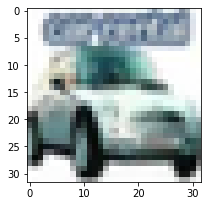

In [4]:
n = 10000

for idx, example in enumerate(cifar_train):
  if idx % n == 0:
    # Aceasta functie sterge ce a fost afisat pana la momentul curent
    dspl.clear_output(wait=True)

    # Completati codul aici si afisati cateva imagini din dataset
    print('idx: ' + str(idx) + ' label: ' + str(cifar_train[idx][1]))
    pix = np.array(cifar_train[idx][0])
    plt.figure(figsize=(3.2, 3.2))
    plt.imshow(pix) 
    plt.show() 
    
    # Aceasta functie opreste procesul pentru 2 secunde 
    time.sleep(2)

## DataLoader

In torch.utils.data este definita clasa *DataLoader*. Aceasta este un wrapper peste o clasa de tip Dataset si este folosita pentru a abstractiza procesarea pe mai mult threaduri, concatenarea exemplelor in batch-uri, si extragerea exemplelor in mod aleatoriu din dataset.

Pentru a crea un obiect de tip *DataLoader* se foloseste constructorul care are urmatorul header:

  \_\_init\_\_(dataset_object, batch_size=1, shuffle=False, num_workers=0, collate_fn=None)

 * dataset_object - obiectul de tip Dataset care va fi inglobat
 * batch_size - dimensiunea batch-ului care va fi returnat
 * shuffle - determina daca exemplele vor fi extrase aleatoriu sau nu
 * num_workers - numarul de procese paralele care vor incarca datele
 * collate_fn - o functie care face preprocesari pe N elemente returnate de obiectul de tip Dataset si le concateneaza intr-un batch. N = batch_size

Clasa DataLoader implementeaza si functia *\_\_len\_\_()* pentru a returna numarul de batch-uri din dataset.

Obiectul de tip Dataset creat anterior returneaza un tuple-uri care contin o imagine de tip PIL.Image si clasa imaginii de tip int. O retea neurala din Pytorch opereaza pe tipul de date torch.Tensor. Prin urmare obiectul de tip DataLoader trebuie sa returneze obiecte de tip torch.Tensor 

### Cerinte
  1. Implementati functia *preproc_fn* ce va fi data ca parametru in constructorul clase DataLoader. Aceasta functie trebuie sa transforme exemplele primite de la obiectul de tip Dataset in Tensors si sa le returneze.
  2. Iterati prin cele doua obiecte de tip DataLoader si printati doar primul element.
  3. Printati shape-ul celor 2 tensori  doar pentru primul element

#### Hints
  * functia __to_tensor__ din *torchvision.transforms.functional* creaza un obiect de tip torch.Tensor dintr-un obiect de tip PIL.Image
  * functia __torch.tensor__ creaza un obiect de tip torch.Tensor dintr-un obiect de tip np.ndarray
  * functia __unsqueeze()__ din clasa torch.Tensor creaza o noua dimensiune intr-un tensor. Aceasta este echivalentul functiei __expand_dims()__ din numpy. Exemplu: Daca avem un obiect de tip torch.Tensor, *t*, care contine un vector cu 10 elemente (shape [10]), *t.unsqueeze(0)* va returna un boiect cu aceleasi valori dar cu shape-ul [1, 10]
  * functia __torch.cat(tensors, dim=0)__ primeste o lista de tensori si ii concateneaza de-a lungul dimensiunii *dim*. Exemplu: functia primeste o lista cu doi vectori cu shape-ul [1, 10] si *dim=0*, rezultatul are shape-ul [2, 10] (batch 2 ?). Daca *dim=1*, rezultatul va fi [1, 20]. Echivalentul numpy este functia __concatenate()__
  * functia __size()__ din clasa torch.Tensor returneaza shape-ul tensorului

In [0]:
import torch


In [6]:
from torchvision.transforms.functional import to_tensor

def preproc_fn(examples):
  """
    Functia primeste un batch de exemple pe care trebuie sa le transforme in tensori
      si sa le puna intr-un batch de tip torch.Tensor.
  """
  processed_images = []
  processed_labels = []

  # Cerinta 1
  for example in examples: # example este un tuplu returnat de obiectul de tip Dataset
    tensor_image = to_tensor(example[0]) # Transformati in obiect de tip torch.Tensor imaginea din example
    tensor_image = tensor_image.unsqueeze(0)  # Adaugati inca o dimensiune la inceputul imaginii
    processed_images.append(tensor_image)

    label = np.array(example[1]) # Creati un obiect de tip np.ndarray din labelul exemplului
    tensor_label = torch.tensor(label) # Creati un tip de tip torch.Tensor din label
    tensor_label = tensor_label.unsqueeze(0) # Adaugati inca o dimensiune la incepului labelului
    processed_labels.append(tensor_label)
    # print(processed_images)
    # print(processed_labels)
  torch_images = torch.cat(processed_images, dim=0)# Concatenati imaginile pe prima dimensiune pentru a forma un batch de imagini
  torch_labels = torch.cat(processed_labels, dim=0) # Concatenati labelurile pe prima dimensiune pentru a forma un batch de labeluri

  return torch_images, torch_labels

loader1 = data.DataLoader(cifar_train, batch_size=1000, shuffle=True, collate_fn=preproc_fn)

print("Datasetul contine {} de batch-uri".format(len(loader1)))

loader2 = data.DataLoader(cifar_train, batch_size=1000, shuffle=True, num_workers=2, collate_fn=preproc_fn)

start = time.time()
# Cerintele 2 si 3 - Iterati prin loader1 si printati doar primul element si shape-ul celor 2 tensori din exemplu
# for load in loader1:

for idx, load in enumerate(loader1):
  if idx == 0:
    load1 = load;
print(load1[0].size())
print(load1[1].size())

end = time.time()
print("Iterarea prin dataset cu worker-ul pe procesul curent dureaza {} secunde".format(end - start))

start = time.time()
# Cerintele 2 si 3 - Iterati prin loader2 si printati doar primul element si shape-ul celor 2 tensori din exemplu
for idx, load in enumerate(loader2):
  if idx == 0:
    load2 = load;
print(load2[0].size())
print(load2[1].size())

end = time.time()
print("Iterarea prin dataset cu 2 worker-i pe procese diferinte dureaza {} secunde".format(end - start))

Datasetul contine 50 de batch-uri
torch.Size([1000, 3, 32, 32])
torch.Size([1000])
Iterarea prin dataset cu worker-ul pe procesul curent dureaza 6.231598138809204 secunde
torch.Size([1000, 3, 32, 32])
torch.Size([1000])
Iterarea prin dataset cu 2 worker-i pe procese diferinte dureaza 3.710020065307617 secunde


## Definirea unei retele cu un singur layer

Modulul *torch.nn* contine clase si functii utilitare pentru crearea retelelor neurale. Pentru a crea o retea neurala se va defini o clasa, *SingleLayerNet* ce mosteneste din clasa *torch.nn.Module*. Clasele din Pyotrch ce definesc straturi, functii de activare, si functii cost mostenesc din clasa *torch.nn.Module*. Aceste clase implementeaza metoda __\_\_forward()\_\___ care este folosita pentru a defini ce se intampla la un forward pass. Aceasta metoda este apelata in metoda __\_\_call\_\_()__ a clasei.

Clasa *Linear* din *troch.nn*, ce mosteneste din *nn.Module* defineste un strat 'fully-connected'. Contructorul primeste 3 parametrii:
 * Dimensiunea vectorului de intrare
 * Dimensiunea vectorului de iesire
 * Daca sa se foloseasca *bias* sau nu

Clasa Simgoid din *torch.nn* , ce mosteneste din *nn.Module*, defineste o functie de activare sigmoid.

### Cerinte
  1. In constructorul clasei *SingleLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Linear*
  2. In constructorul clase *SingleLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Sigmoid*
  3. In metoda __forward()__ definiti o variabila care sa contina iesirea stratului linear aplicat pe intrarea 'x'.
  4. In metoda __forward()__ definiti o variabila care sa contina iesirea functiei de activare sigmoid aplicata pe iesirea stratului linear si returnati aceasta variabila

#### Hint
 * Imaginea de intrare are dimensiune 32x32x3 (inaltime x latime x canale). Vectorul de itnrare in retea va avea dimensiune 32*32*3

#### Atentie
 * Dimensiunea de iesire a stratului trebuie sa fie de aceeasi marime cu numarul de clase.

In [7]:
### Exemplu utilizare metoda __call__()
class A(object):
  def __init__(self):
    self.a ='A'

  def __call__(self, mesaj):
    print(self.a, mesaj)

obj = A()
obj("OK!")

A OK!


In [0]:
import torch.nn as nn

class SingleLayerNet(nn.Module):

  def __init__(self):
    super(SingleLayerNet, self).__init__()

    # Cerinta 1 - completati codul aici
    self.linear = nn.Linear(3072,10)
    # Cerinta 2 - completati codul aici
    self.sigmoid = nn.Sigmoid()

  def forward(self, x: torch.Tensor):
    phi = []
    for y in x:
      y = y.view(-1)
      y = self.sigmoid(self.linear(y))
      phi.append(y)
    phi = torch.stack(phi)
    return phi


## Preprocesare pentru retele cu straturi 'fully-connected'

Avand o retea cu straturi 'fully-connected' este necesar ca imaginea sa fie redimensionata intr-un vector. Clasa *torch.Tensor* defineste metoda __view()__ care returneaza un tensor redimensionat.

### Cerinte
  1. Completati functia de mai jos pentru a redimensiona imaginea intr-un vector.
  2. Extrageti un batch din DataLoader-ul de antrenare si printati dimensiunile imaginii.

In [9]:
# Varianta numpy

img1 = np.random.rand(32, 32, 3)
img2 = np.random.rand(32, 32, 3)

print(img1.shape, img2.shape)

reshaped1 = img1.reshape(-1)
reshaped2 = img2.reshape(32*32*3)

print(reshaped1.shape, reshaped2.shape)

(32, 32, 3) (32, 32, 3)
(3072,) (3072,)


In [14]:
from torchvision.transforms.functional import normalize

def preproc_liniarized_fn(examples):
  processed_images = []
  processed_labels = []

  for example in examples:
    tensor_image = to_tensor(example[0])
    # In linia de mai jos imaginea este normalizata astfel incat sa aiba toate valorile in 
    # [-1, 1] in loc de [0, 255]
    normalized_tensor_image = normalize(tensor_image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    # Cerinta 1
    vector_image = normalized_tensor_image.view(32,32,3)
    vector_image = vector_image.unsqueeze(0)
    processed_images.append(vector_image)
    
    label = np.array(example[1])
    tensor_label = torch.tensor(label)
    tensor_label = tensor_label.unsqueeze(0)
    processed_labels.append(tensor_label)

  torch_images = torch.cat(processed_images, dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels

batch_size = 100

train_loader = data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True, num_workers=2, collate_fn=preproc_liniarized_fn)
test_loader = data.DataLoader(cifar_test, batch_size=1, shuffle=False, collate_fn=preproc_liniarized_fn)

# Cerinta 2


print(next(iter(train_loader)))

(tensor([[[[ 0.7961,  0.8196,  0.8431],
          [ 0.8745,  0.8431,  0.7176],
          [ 0.3725, -0.2235, -0.3333],
          ...,
          [ 0.0196, -0.1451,  0.0431],
          [ 0.1686,  0.1294,  0.0667],
          [-0.1686, -0.1137, -0.2392]],

         [[ 0.6941,  0.6000,  0.6235],
          [ 0.7176,  0.4667,  0.2863],
          [ 0.6549,  0.8353,  0.7255],
          ...,
          [ 0.3804,  0.3961,  0.4118],
          [ 0.3882,  0.4196,  0.3961],
          [-0.0118, -0.2549,  0.0353]],

         [[ 0.6235,  0.1686,  0.2157],
          [ 0.2157, -0.1608, -0.4118],
          [-0.5059, -0.6157, -0.3804],
          ...,
          [ 0.4667,  0.4275,  0.4039],
          [ 0.4118,  0.4118,  0.3804],
          [-0.0039, -0.3020, -0.0431]],

         ...,

         [[ 0.4196,  0.3804,  0.3882],
          [ 0.3647,  0.2941,  0.2392],
          [-0.0824, -0.4667, -0.3961],
          ...,
          [-0.6863, -0.7176, -0.7098],
          [-0.8431, -0.8902, -0.7725],
          [-0.8118, -

## Definirea antrenarii

Pentru definirea antrenarii avem urmatorii pasi:
 * Definirea numarului de epoci (de cate ori parcurgem intregul dataset)
 * Definirea obiectului de tip *SingleLayerNet*
 * Definirea optimizatorului. Vom folosi Stochastic Gradient Descent (SGD) pentru optimizarea retelei, prin urmare definim un obiect de tip *optim.SGD*. Constructorul acestei clase primeste parametrii pe care trebuie sa-i optimizeze (single_layer_net.parameters()) si rata de invatare (lr=1e-2)
 * Definim functia cost de tip *nn.CorssEntropyLoss()*
 * Definim functa care parcurge datasetul si antreneaza reteaua.

In [0]:
import torch.optim as optim

# Definim numarul de epoci
epochs = 10

# Definim reteaua
single_layer_net = SingleLayerNet()

# Definim optimizatorul
optimizer = optim.SGD(single_layer_net.parameters(), lr=1e-2)
# Dupa definirea optimizatorului si dupa fiecare iteratie trebuie apelata functia zero_grad().
# Aceasta face toti gradientii zero.
optimizer.zero_grad()

# Definim functia cost
loss_fn = nn.CrossEntropyLoss()

def train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader, 
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  # Iteram prin numarul de epoci
  for e in range(epochs):
    # Iteram prin fiecare exemplu din dataset
    for images, labels in train_loader:
      # Aplicam reteaua neurala pe imaginile de intrare
      out = net(images)
      # Aplicam functia cost pe iesirea retelei neurale si pe adnotarile imaginilor 
      loss = loss_fn(out, labels)
      # Aplicam algoritmul de back-propagation
      loss.backward()
      # Facem pasul de optimizare, pentru a aplica gradientii pe parametrii retelei
      optimizer.step()
      # Apelam functia zero_grad() pentru a uita gradientii de la iteratie curenta
      optimizer.zero_grad()
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    # Caluculul acuratetii
    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * batch_size))

## Antrenam propria retea

In [36]:
train_fn(epochs, train_loader, test_loader, single_layer_net, loss_fn, optimizer)

Loss-ul la finalul epocii 0 are valoarea 2.1249685287475586
Acuratetea la finalul epocii 0 este 31.85%
Loss-ul la finalul epocii 1 are valoarea 2.0764002799987793
Acuratetea la finalul epocii 1 este 33.37%
Loss-ul la finalul epocii 2 are valoarea 2.057636260986328
Acuratetea la finalul epocii 2 este 33.85%
Loss-ul la finalul epocii 3 are valoarea 2.044343948364258
Acuratetea la finalul epocii 3 este 34.20%
Loss-ul la finalul epocii 4 are valoarea 2.040034770965576
Acuratetea la finalul epocii 4 este 35.09%
Loss-ul la finalul epocii 5 are valoarea 2.0401737689971924
Acuratetea la finalul epocii 5 este 35.15%
Loss-ul la finalul epocii 6 are valoarea 1.9941601753234863
Acuratetea la finalul epocii 6 este 35.33%
Loss-ul la finalul epocii 7 are valoarea 2.038362503051758
Acuratetea la finalul epocii 7 este 35.60%
Loss-ul la finalul epocii 8 are valoarea 2.074580430984497
Acuratetea la finalul epocii 8 este 35.52%
Loss-ul la finalul epocii 9 are valoarea 2.047663927078247
Acuratetea la final

## Definirea unei retele cu 2 straturi si antrenarea ei

### Cerinte
 1. Definiti o clasa numita *TwoLayerNet* care sa implementeze o retea neurala cu 2 straturi 'fully-connected' si 2 activari *nn.Sigmoid* pentru fiecare strat linear
 2. Definiti un optimizator pentru antrenearea acestei retele
 3. Folositi functia deifnita mai sus pentru a antrena aceasta retea

#### Atentie
 * Dimensiunea de iesire a primului strat trebuie sa se potriveasca cu dimensiunea de intrare a celui de-al doilea.

In [37]:
# Cerinta 1 - Definiti reteaua
class TwoLayerNet(nn.Module):

    def __init__(self):
      super(TwoLayerNet,self).__init__()
      self.fli1 = nn.Linear(3072,300)
      self.fli2 = nn.Linear(300,10)
      self.sigm1 = nn.Sigmoid()
      self.sigm2 = nn.Sigmoid()
    def forward(self,x: torch.Tensor):
      phi = []
      for y in x:
        y = y.view(-1)
        y = self.sigm1(self.fli1(y))
        y = self.sigm2(self.fli2(y))
        phi.append(y)
      phi = torch.stack(phi)
      return phi
# Instantierea retelei
two_layer_net = TwoLayerNet()
    


# Cerinta 2 - Definiti un optimizator pentru aceasta retea
optimizer_double = optim.Adam(two_layer_net.parameters(), lr=1e-3)

# Cerinta 3 - Antrenati reteaua
train_fn(epochs, train_loader, test_loader, two_layer_net, loss_fn, optimizer_double)

Loss-ul la finalul epocii 0 are valoarea 2.0191240310668945
Acuratetea la finalul epocii 0 este 39.86%
Loss-ul la finalul epocii 1 are valoarea 1.9606486558914185
Acuratetea la finalul epocii 1 este 41.59%
Loss-ul la finalul epocii 2 are valoarea 1.9423824548721313
Acuratetea la finalul epocii 2 este 42.82%
Loss-ul la finalul epocii 3 are valoarea 1.925805687904358
Acuratetea la finalul epocii 3 este 43.58%
Loss-ul la finalul epocii 4 are valoarea 1.9012526273727417
Acuratetea la finalul epocii 4 este 43.87%
Loss-ul la finalul epocii 5 are valoarea 1.8600291013717651
Acuratetea la finalul epocii 5 este 43.98%
Loss-ul la finalul epocii 6 are valoarea 1.8809645175933838
Acuratetea la finalul epocii 6 este 44.63%
Loss-ul la finalul epocii 7 are valoarea 1.9128459692001343
Acuratetea la finalul epocii 7 este 45.47%
Loss-ul la finalul epocii 8 are valoarea 1.815050482749939
Acuratetea la finalul epocii 8 este 45.52%
Loss-ul la finalul epocii 9 are valoarea 1.858327031135559
Acuratetea la fi

## Crearea dinamica a unei retele

In  *torch.nn* exista clasa *Sequential* care primeste o lista de straturi si functii de activare in oridnea in care trebuie aplicate, e.g. [linear, sigmoid, linear, sigmoid]. Rezultatul este inlantuirea acestor straturi si functii de activare.

### Cerinta
 * Completati Constructorul de mai jos astfel incat sa se creze o retea folosind *nn.Sequential*

In [0]:
class Net(nn.Module):

  def __init__(self, layer_sizes: list, activation: type):
    """
      Constructor.

      :param layer_sizes - Parametru de tip lista care contine dimensiunile fiecarui strat din retea
      :param activation - Parametru de tip type. Poate fi nn.Sigmoid, nn.Tanh, nn.ReLU. Adica clasa pentru a instantia mai tarziu
    """
    super(Net, self).__init__()
    
    #
    layers = []
    for i in range(0, len(layer_sizes)):
      layers.append(nn.Linear(layer_sizes[i][0],layer_sizes[i][1]))
      layers.append(activation[i])
    self.net = nn.Sequential(*layers)

  def forward(self, x: torch.Tensor):
    phi = []
    for y in x:
        y = y.view(-1)
        phi.append(y)
    phi = torch.stack(phi)
    return self.net(phi)

## Antrenarea retelei cu N straturi

Mai jos functia de antrenare a fost modificata pentru a afisa modificarile parametrilor retelei in timpul antrenarii. Aceasta se obtine prin implementarea functiei __plot_weights()__.

### Cerinte

  1. Creati un obiect de tipul *Net*
  2. Creati un optimizator pentru reteaua de tipul *Net*
  3. Antrenati reteaua folosind functia __plotting_train_fn()__
  4. Experimentati cu retele straturi si functii de activare diferite
  5. Modificati celula de mai jos si scrieti o functie numita __plot_loss()__ pentru a afisa un grafic care arata evolutia rezultatului functiei cost in timp. Faceti acelasi lucru si pentru acuratete.

Loss-ul la finalul epocii 0 are valoarea 1.49946928024292
Acuratetea la finalul epocii 0 este 46.03%


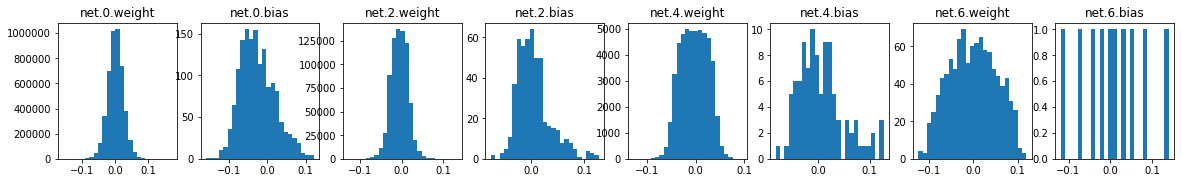

Loss-ul la finalul epocii 1 are valoarea 1.4646084308624268
Acuratetea la finalul epocii 1 este 49.74%


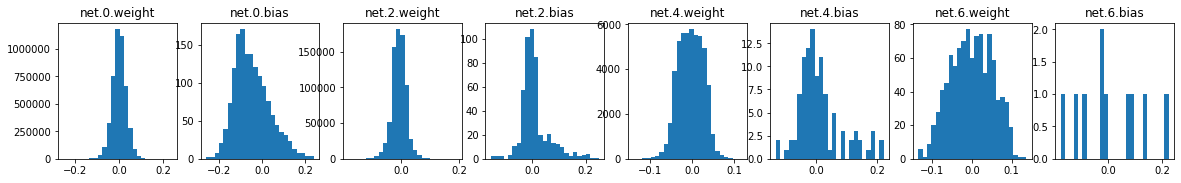

Loss-ul la finalul epocii 2 are valoarea 1.2524956464767456
Acuratetea la finalul epocii 2 este 51.74%


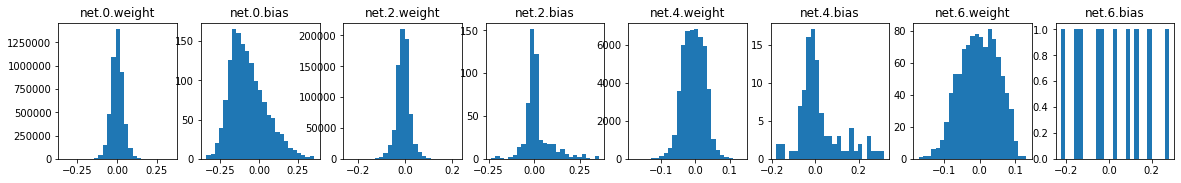

Loss-ul la finalul epocii 3 are valoarea 1.2853175401687622
Acuratetea la finalul epocii 3 este 51.67%


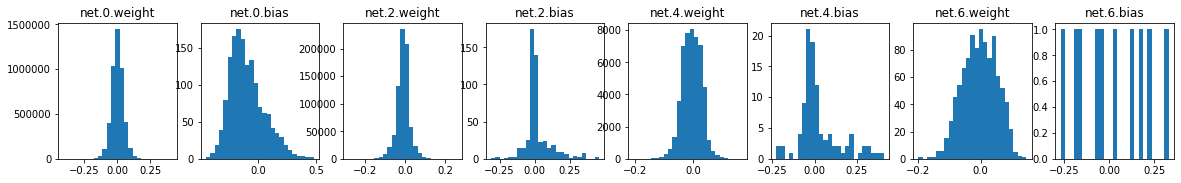

Loss-ul la finalul epocii 4 are valoarea 1.246842384338379
Acuratetea la finalul epocii 4 este 54.32%


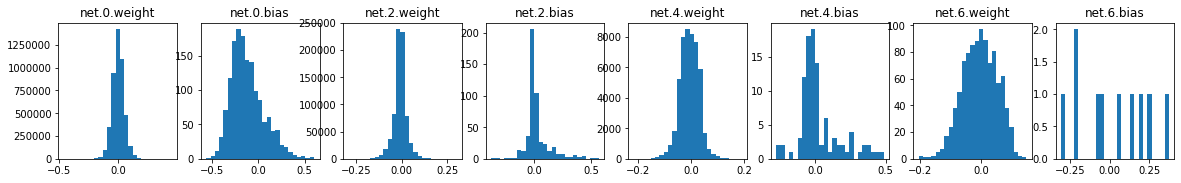

Loss-ul la finalul epocii 5 are valoarea 1.027542233467102
Acuratetea la finalul epocii 5 este 53.97%


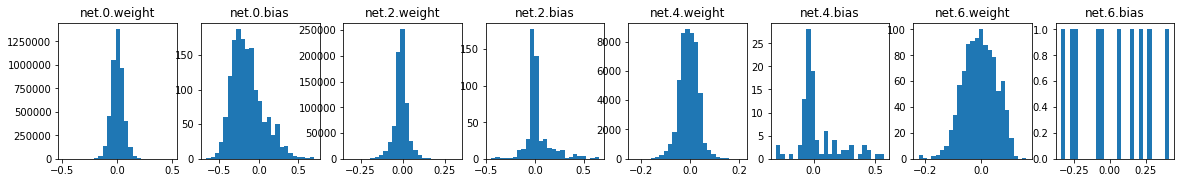

Loss-ul la finalul epocii 6 are valoarea 0.9031897783279419
Acuratetea la finalul epocii 6 este 54.46%


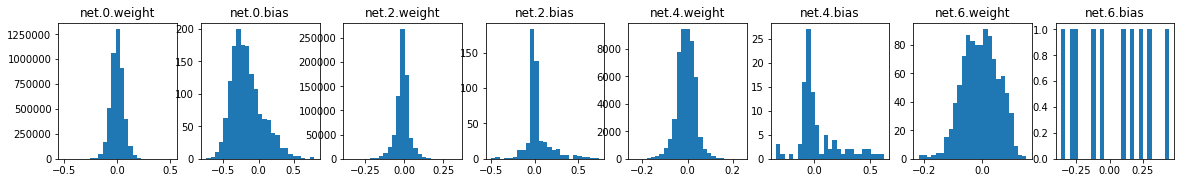

Loss-ul la finalul epocii 7 are valoarea 0.890638530254364
Acuratetea la finalul epocii 7 este 53.44%


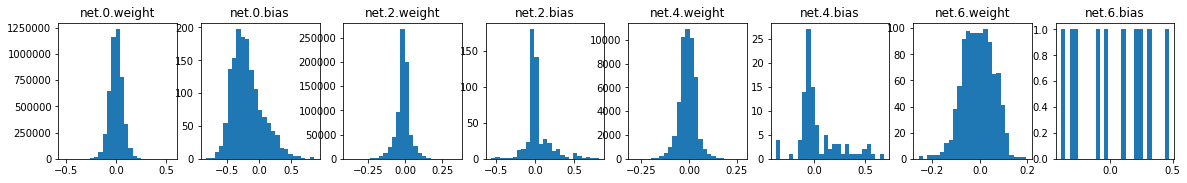

Loss-ul la finalul epocii 8 are valoarea 0.7955232262611389
Acuratetea la finalul epocii 8 este 54.38%


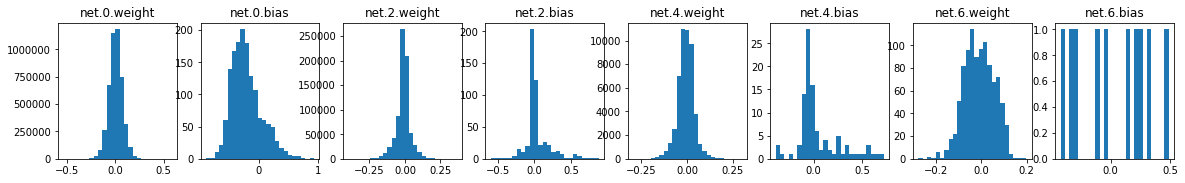

Loss-ul la finalul epocii 9 are valoarea 0.6607658267021179
Acuratetea la finalul epocii 9 este 54.19%


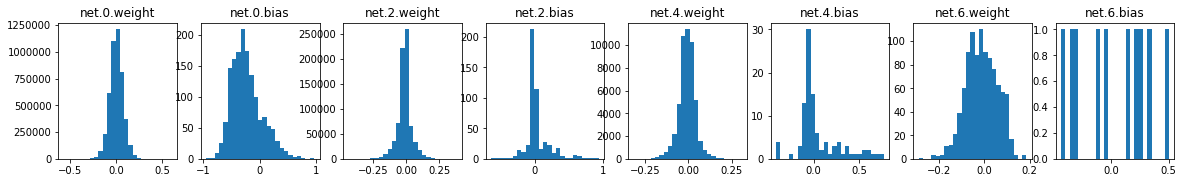

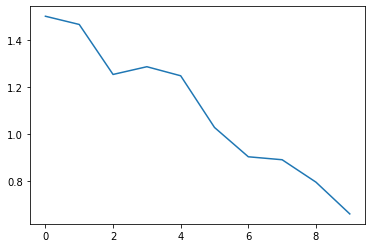

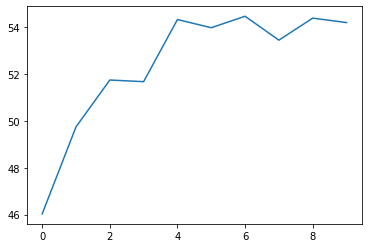

In [66]:
def plot_weights(net: nn.Module):
  named_params = net.named_parameters()
  np_params = []
  np_param_names = []
  for name, param in named_params:
    np_params.append(param.clone().detach().view(-1).numpy())
    np_param_names.append(name)

  fig = plt.figure(figsize=(20, 2.5))

  count = len(np_param_names)
  for i in range(count):
    plt.subplot(1, count, i+1)
    plt.hist(np_params[i], bins=25)
    plt.title(np_param_names[i])
  plt.show()
# Cerinta 5 - completati codul aici
def plot_loss(loss_his,acc_his):
  plt.plot(loss_his)
  plt.show()
  plt.plot(acc_his)
  plt.show()

def plotting_train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader, 
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  for e in range(epochs):
    for images, labels in train_loader:

      out = net(images)
      loss = loss_fn(out, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1
    #
    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * 100))
    plot_weights(net)
    loss_history.append(loss.item())
    acc_history.append((correct / count) * 100)

# Cerinta 1 - completati codul aici
neural = Net([[3072,1500],[1500 ,500],[500 ,100],[100 ,10]],[nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.ReLU()])

# Cerinta 2 - completati codul aici
optimizer_mutiple = optim.Adam(neural.parameters(),lr=1e-3)


loss_history = []
acc_history = []

# Cerinta 3 - completati codul aici
plotting_train_fn(10,train_loader,test_loader,neural,loss_fn,optimizer_mutiple)

plot_loss(loss_history,acc_history)